In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from sklearn import cluster
import numpy as np

(124416, 3)


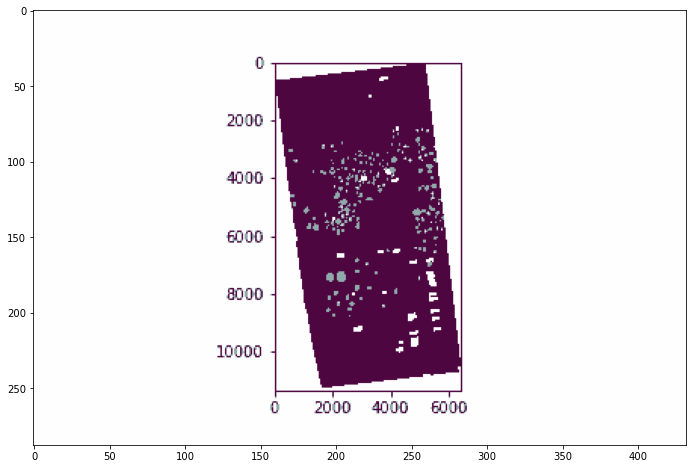

In [ ]:
n_colors = 64

dem_mounds = cv2.imread("corredcted Mounds.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
dem_mounds = np.array(dem_mounds, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(dem_mounds.shape)
assert d == 3
image_array = np.reshape(dem_mounds, (w * h, d))

print(image_array.shape)

kmeans_cluster = cluster.KMeans(n_clusters=3)
kmeans_cluster.fit(image_array)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(w, h, d))

In [ ]:
# #To work Locally

# dem_path = "MARS-Dataset/training_site/DEM/Low-res_DEM/"
# lowres_dem_path = dem_path + 'Firsoff_HiRISE_5_low_res.tif-adj.tif'
# hill_shade_path = dem_path + 'Hillshade.tif'

In [1]:
# To work on Colab

!pip install gdal
!pip install mpld3

from google.colab import drive
drive.mount('/content/drive')

dem_path = "/content/drive/My Drive/Image Segmentation/"
lowres_dem_path = dem_path + 'Firsoff_HiRISE_5_low_res.tif-adj.tif'
hill_shade_path = dem_path + 'Hillshade.tif'

     |████████████████████████████████| 201 kB 4.1 MB/s 
Mounted at /content/drive


In [2]:
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
ds = gdal.Open(lowres_dem_path, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()
img_array.shape

(632, 358)

In [4]:
X = img_array.reshape((-1,1))
X.shape

(226256, 1)

In [6]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
# kmeans.labels_

KMeans(n_clusters=3)

In [7]:
X_cluster = kmeans.labels_
X_cluster = X_cluster.reshape(img_array.shape)

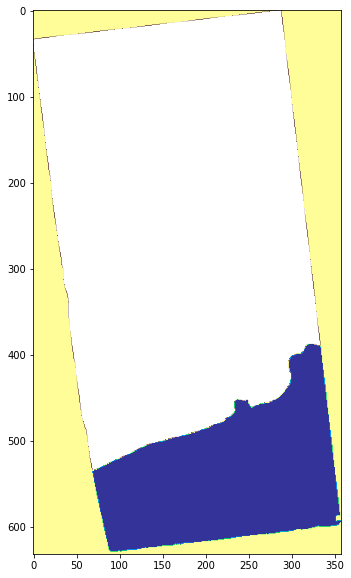

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(X_cluster, cmap="terrain")
plt.show()

In [ ]:
format = "GTiff"
driver = gdal.GetDriverByName(format)

[cols, rows] = img_array.shape

outDataRaster = driver.Create("k_means.tif", rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outDataRaster.SetProjection(ds.GetProjection())##sets same projection as input


outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

outDataRaster.FlushCache() ## remove from memory
del outDataRaster ## delete the data (not the actual geotiff)